In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Here reference level $C_{0}^{\alpha}L_{0}^{1-\alpha}$ refers to a steady state variable.

The utility is given by:
\begin{equation}
    u(C_{t},L_{t}) = \begin{cases}
    \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho} \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho} - \lambda(\frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho} - \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho}) \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
\end{cases}
\end{equation}



If we reframe this a bit to make sure all the object value is positive:
\begin{equation}
    u(C_{t},L_{t}) = \begin{cases}
    \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho} + (\lambda-1) \frac{(C_{0}^{\alpha}L_{0}^{1-\alpha})^{1-\rho}}{1-\rho}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \frac{(C_{t}^{\alpha}L_{t}^{1-\alpha})^{1-\rho}}{1-\rho}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

The partial derivative with respect to $C_{t}$ is:
\begin{equation}
    \frac{\partial u(C_{t},L_{t})}{\partial C_{t}} = \begin{cases}
    \alpha C_{t}^{\alpha(1-\rho)-1} L_{t}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \alpha C_{t}^{\alpha(1-\rho)-1} L_{t}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

The partial derivative with respect to $L_{t}$ is:
\begin{equation}
    \frac{\partial u(C_{t},L_{t})}{\partial L_{t}} = \begin{cases}
    (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha} \geq C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1}
    \quad \text{if } C_{t}^{\alpha}L_{t}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation}

In [2]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [3]:
#import package
import numpy as np
from datascience import Table
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy import interpolate
from scipy import optimize
import time

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# import data
import pandas as pd
interestTable = pd.read_csv('return_H.csv', usecols=[1,2,3])  ## Import interest rate
mortalityTable = pd.read_csv('newmort2.csv', usecols=[1,2,3])  ## Import mortality table'
# Expectation = Table.from_df(interestTable)  ## Convert readin csv file to 'table'

In [4]:
# interestTable = pd.read_csv('return_H.csv', usecols=[1,2,3])  ## Import interest rate
# print(type(interestTable))

In [5]:
θ = 0.5
interestTable['interest'] = 1 + (1-θ)*interestTable['Bond'] + θ*interestTable['Eq']
# interestTable.sort_values('interest').head()
Expectation = Table.from_df(interestTable.sort_values('interest'))
Expectation.show(10)

Eq,Bond,Probability,interest
-0.459607,0.0353688,0.000644745,0.787881
-0.455473,0.0356227,0.000322373,0.790075
-0.454567,0.0359562,0.000805932,0.790695
-0.446123,0.0360735,0.000322373,0.794975
-0.445101,0.0351894,0.000805932,0.795044
-0.439149,0.0357951,0.000322373,0.798323
-0.438084,0.0354885,0.000322373,0.798702
-0.431345,0.0346107,0.000161186,0.801633
-0.432729,0.0362833,0.000322373,0.801777
-0.430706,0.0348564,0.000322373,0.802075


In [6]:
# parameter setting
ρ = 0.5 # 5?
α = 0.9
β = 1
λ = 3

# C0 = 5.5 # 50?
# L0 = 3/7
# Rx = np.power(C0,α)*np.power(L0,1-α)
R0 = 4.5

Y1 = 8.5
Y2 = 3.0 # salary
# interest = 0.05
# θ = 0.5

In [7]:
Upper_grid = 100.5 #in ($0,000) dollars
Lower_grid = 0.5
grids = 50
A74 = np.linspace(Lower_grid, Upper_grid, grids)


print('α=0.9, ρ=0.5, λ=3, Y1=8.5, Y2=3.0')

Upper_grid_ref = 40.5 #in ($0,000) dollars
Lower_grid_ref = 0.5
Refc_grids = 20
CL_ref75 = np.linspace(Lower_grid_ref, Upper_grid_ref, Refc_grids)

# print(M75)
# print('Referece C = '+str(C_ref75))
print('# of balance grids='+str(grids))
print('# of reference grids='+str(Refc_grids))

α=0.9, ρ=0.5, λ=3, Y1=8.5, Y2=3.0
# of balance grids=50
# of reference grids=20


# ===========================EGM ===========================

In [8]:
def utility_1(c, l, Rx):
    '''
    Define the penalty utility function of consumption (c) and leisure (l), return the value of utility
    '''
    utility = np.copy(c)
    criteria = np.power(c,α)*np.power(l,1-α) >= Rx
    
    utility[c<0] = -λ * np.power(np.power(-c[c<0],α) * np.power(l[c<0],1-α),1-ρ) / (1-ρ)
    utility[(c>0) & (criteria==True)] = np.power(np.power(c[(c>0)&(criteria==True)],α) * np.power(l[(c>0)&(criteria==True)],1-α), 1-ρ)/(1-ρ) + \
                    (λ-1)*np.power(Rx,1-ρ)/(1-ρ)
    utility[(c>0) & (criteria==False)] = λ * np.power(np.power(c[(c>0)&(criteria==False)],α) * np.power(l[(c>0)&(criteria==False)],1-α),1-ρ) / (1-ρ)
#     print(utility[c<0])
    return utility

In [9]:
def constraint_l(leisure):
    if leisure < 2/7:
        leisure = 2/7
    elif leisure > 1:
        leisure = 1
    return leisure

def criteria(c, l, Rx):
    return np.power(c,α)*np.power(l,1-α) > Rx

def criteria2(c, l, Rx):
    return np.power(c,α)*np.power(l,1-α) < Rx

In [10]:
def utility_1_diff_c(c, l, Rx):
    '''
    Return the partial derivative of u(c,l) with respect to c
    '''
    utility_diff = np.copy(c)
    utility_diff[criteria(c, l, Rx)==True] = α * np.power(c[(c>0) & (criteria(c, l, Rx)==True)],α*(1-ρ)-1) \
                                            * np.power(l[(c>0) & (criteria(c, l, Rx)==True)], (1-α)*(1-ρ))
    utility_diff[criteria(c, l, Rx)==False] = λ * α * np.power(c[(c>0) & (criteria(c, l, Rx)==False)],α*(1-ρ)-1) \
                                            * np.power(l[(c>0) & (criteria(c, l, Rx)==False)], (1-α)*(1-ρ))
    return utility_diff

\begin{equation} \label{eq14}
\begin{split}
    u'_{L}(C_{t},L_{t}) \frac{1}{Y_{t}} &= \beta(1-q_{t})E_{t}[u'_{C}(C_{t+1},L_{t+1}) (1 + \underline{\theta} i + (1 - \underline{\theta}) r)|A_{t}] \\
    LHS &= RHS
\end{split}
\end{equation}

where
\begin{equation*}
    u'_{C}(C_{t+1},L_{t+1}) = \begin{cases}
    \alpha C_{t+1}^{\alpha(1-\rho)-1} L_{t+1}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t+1}^{\alpha}L_{t+1}^{1-\alpha} > C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \lambda \alpha C_{t+1}^{\alpha(1-\rho)-1} L_{t+1}^{(1-\alpha)(1-\rho)}
    \quad \text{if } C_{t+1}^{\alpha}L_{t+1}^{1-\alpha}< C_{0}^{\alpha}L_{0}^{1-\alpha} \\
    \end{cases}
\end{equation*}

If criteria ($C_{t}^{\alpha}L_{t}^{1-\alpha} > C_{0}^{\alpha}L_{0}^{1-\alpha}$) is True
        \begin{equation}
        \begin{split}
            LHS &= (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= (1-\alpha) (\frac{\alpha Y_{t}}{1-\alpha} L_{t})^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \alpha  (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1} L_{t}^{-\rho}
        \end{split}
        \end{equation}
    therefore, the optimal leisure is calculated by:
        \begin{equation} \label{eq16}
            L_{t}^{*}=[\frac{RHS}{\alpha (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1}}]^{-\frac{1}{\rho}}
        \end{equation}
        
If criteria ($C_{t}^{\alpha}L_{t}^{1-\alpha} < C_{0}^{\alpha}L_{0}^{1-\alpha}$) is True
        \begin{equation}
        \begin{split}
            LHS &= \lambda (1-\alpha) C_{t}^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \lambda (1-\alpha) (\frac{\alpha Y_{t}}{1-\alpha} L_{t})^{\alpha(1-\rho)} L_{t}^{(1-\alpha)(1-\rho)-1} / Y_{t} \\
            &= \lambda \alpha (\frac{\alpha Y_{t}}{1-\alpha})^{\alpha(1-\rho)-1} L_{t}^{-\rho}
        \end{split}
        \end{equation}
    therefore, the optimal leisure is calculated by:
        \begin{equation} \label{eq19}
            L_{t}^{*}=[\frac{RHS}{\lambda \alpha (\frac{\alpha Y_{t}}{1-\alpha})^{ \alpha(1-\rho)-1}}]^{-\frac{1}{\rho}}
        \end{equation}

In [11]:
def utility_1_diff_inv_l(RHS, Y2):
    '''
    When there are no constraints on either c or l, if the composite of c&l is above the reference level,
    return the optimal leisure given the above formula.
    '''
    LHS = α*np.power(α*Y2/(1-α), α*(1-ρ)-1)
    leisure = np.power(RHS/LHS, -1/ρ)
    return leisure

def utility_1_diff_inv_l2(RHS, Y2):
    '''
    When there are no constraints on either c or l, if the composite of c&l is below the reference level,
    return the optimal leisure given the above formula.
    '''
    LHS = α*np.power(α*Y2/(1-α), α*(1-ρ)-1)
    leisure = np.power(RHS/LHS/λ, -1/ρ)
    return leisure

In [12]:
def utility_1_diff_inv_c(leisure, RHS):
    '''
    Given optimal leisure is found, if the composite of c&l is above the reference level, 
    return the value of optimal consumption
    '''
    x = np.power(leisure, (1-α)*(1-ρ))
    y = np.power(RHS / (x*α), 1/(α*(1-ρ)-1))
    return y

def utility_1_diff_inv_c2(leisure, RHS):
    '''
    Given optimal leisure is found, if the composite of c&l is below the reference level, 
    return the value of optimal consumption
    '''
    x = np.power(leisure, (1-α)*(1-ρ))
    y = np.power(RHS / (x*α*λ), 1/(α*(1-ρ)-1))
    return y

In [13]:
def utility_1_diff_c(c, l, Rx):
    '''
    Return the partial derivative of u(c,l) with respect to c
    '''
    utility_diff = np.copy(c)
    utility_diff[criteria(c, l, Rx)==True] = α * np.power(c[(c>0) & (criteria(c, l, Rx)==True)],α*(1-ρ)-1) \
                                            * np.power(l[(c>0) & (criteria(c, l, Rx)==True)], (1-α)*(1-ρ))
    utility_diff[criteria(c, l, Rx)==False] = λ * α * np.power(c[(c>0) & (criteria(c, l, Rx)==False)],α*(1-ρ)-1) \
                                            * np.power(l[(c>0) & (criteria(c, l, Rx)==False)], (1-α)*(1-ρ))
    return utility_diff

# Age 74

# First assume no uncertainty on interest return

In [14]:
def Optimal_74_1(Ax, Rx, income=Y2):
    consumption = np.nan
    leisure = np.nan
    
#     interest = 0.8
    interest = 1.2
    
    C75 = Ax*interest # a scatter
    L75 = 1
    M = Rx
    N = np.power(C75,α)*np.power(L75,1-α)
    RHS1 = β*(1-mortalityTable['X'][73]) * α*np.power(C75,α*(1-ρ)-1)*np.power(L75, (1-α)*(1-ρ)) * interest
    RHS2 = β*(1-mortalityTable['X'][73]) * λ * α*np.power(C75,α*(1-ρ)-1)*np.power(L75, (1-α)*(1-ρ)) * interest
    
    default1_lei = M / np.power(α*income/(1-α), α)
    default1_lei = constraint_l(default1_lei)
    default1_con = np.power(M / np.power(default1_lei,1-α), 1/α)
    
    default2_lei = N / np.power(α*income/(1-α), α)
    default2_lei = constraint_l(default2_lei)
    default2_con = np.power(N / np.power(default2_lei,1-α), 1/α)
    
    if M<N:
        #assume M < [] < N, i.e. ">"&">"
        lei1 = utility_1_diff_inv_l(RHS1, income)
        lei1 = constraint_l(lei1)
        con1 = utility_1_diff_inv_c(lei1, RHS1)
        R_next = np.power(con1,α)*np.power(lei1,1-α)
        if (M<R_next) & (R_next<N):
            consumption = con1
            leisure = lei1
        elif R_next<M: # "<"&">"
            lei1 = utility_1_diff_inv_l2(RHS1, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c2(lei1, RHS1)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next<M:
                consumption = con1
                leisure = lei1
            else: # R_next=M
                consumption = default1_con
                leisure = default1_lei
        elif R_next>N: # ">"&"<"
            lei1 = utility_1_diff_inv_l(RHS2, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c(lei1, RHS2)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next>N:
                consumption = con1
                leisure = lei1
            else: # R_next=N
                consumption = default2_con
                leisure = default2_lei
#                 consumption = 60
#                 leisure = 2.0
    elif M>N:
        #assume N < [] < M, i.e. "<"&"<"
        lei1 = utility_1_diff_inv_l2(RHS2, income)
        lei1 = constraint_l(lei1)
        con1 = utility_1_diff_inv_c2(lei1, RHS2)
        R_next = np.power(con1,α)*np.power(lei1,1-α)
        if (N<R_next) & (R_next<M):
            consumption = con1
            leisure = lei1
        elif R_next<N: # "<"&">"
            lei1 = utility_1_diff_inv_l2(RHS1, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c2(lei1, RHS1)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next<N: #& (R_next<M):
                consumption = con1
                leisure = lei1
            else: # R_next=N
                consumption = default2_con
                leisure = default2_lei
#                 consumption = 60
#                 leisure = 2.5
        elif R_next>M: # ">"&"<"
            lei1 = utility_1_diff_inv_l(RHS2, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c(lei1, RHS2)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next>M:
                consumption = con1
                leisure = lei1
            else: # R_next=M
                consumption = default1_con
                leisure = default1_lei
#                 consumption = 60
#                 leisure = 2.5
    else:
        print('Unexpected error')
    
    return consumption, leisure

hide_toggle()

In [15]:
aa, bb = np.meshgrid(A74, CL_ref75)

C74 = np.zeros((len(CL_ref75),len(A74)))
L74 = np.zeros((len(CL_ref75),len(A74)))
M74 = np.zeros((len(CL_ref75),len(A74)))

start_time = time.time()

for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
    for k, node in enumerate(A74):
        C74[j][k], L74[j][k] = Optimal_74_1(Ax=node, Rx=C0)
        M74[j][k] = node - Y2*(1-L74[j][k]) + C74[j][k]

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.1356368064880371 seconds ---


In [16]:
Optimal_results_EGM = {}
Optimal_results_EGM['A74'] = aa
Optimal_results_EGM['R74'] = bb
Optimal_results_EGM['C74'] = C74
Optimal_results_EGM['L74'] = L74
Optimal_results_EGM['M74'] = M74

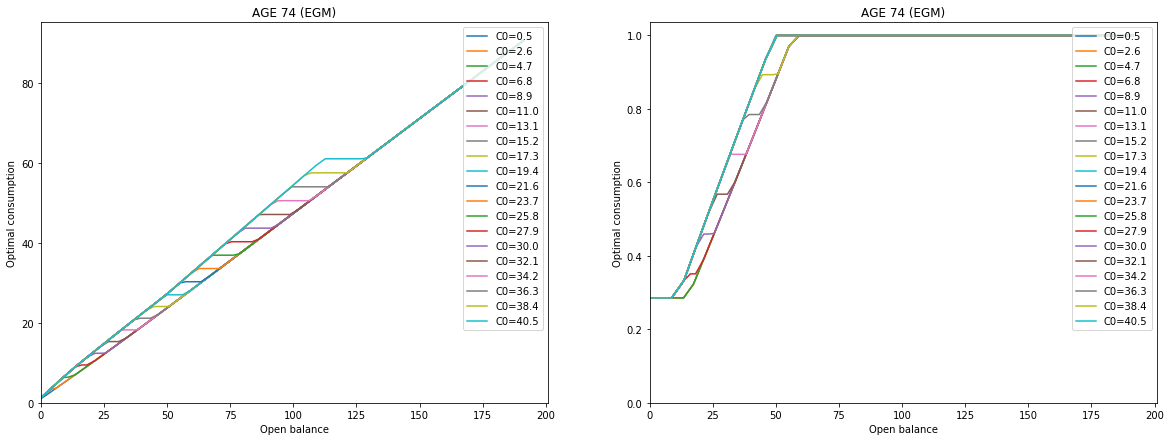

In [17]:
# SELECT YOUR AGE HERE TO PLOT OPTIMAL CONSUMPTION AND LEISURE (65-74)
AGE = 74

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['C%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, )
    
plt.subplot(1,2,2)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['L%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, )
    
hide_toggle()

In [18]:
def solve_73_65(A, age, income, table, Rx, raa=θ): # function on scatter node of post-decision balance At
    '''
    solve for optimal consumption and leisure for age 73-65
    only constraints on leisure, no constraints on consumption.
    Interpolate on 2D dimension - different from steady reference case.
    '''

    consumption = np.nan
    leisure = np.nan
#     interest = 0.8
    interest = 1.05
#     xx, yy = np.meshgrid(table['M%1d'%(age+1)], table['R%1d'%(age+1)])
    Interpolation_C = interpolate.Rbf(table['M%1d'%(age+1)].ravel(), table['R%1d'%(age+1)].ravel(), 
                                      table['C%1d'%(age+1)].ravel())
    Interpolation_L = interpolate.Rbf(table['M%1d'%(age+1)].ravel(), table['R%1d'%(age+1)].ravel(), 
                                      table['L%1d'%(age+1)].ravel())
    C_next = Interpolation_C(A*interest, Rx) # this is a vector
    L_next = Interpolation_L(A*interest, Rx)
#     print(C_next, L_next)
    M = Rx
    N = np.power(C_next,α)*np.power(L_next,1-α)
    RHS1 = β*(1-mortalityTable['X'][age-1]) * α*np.power(C_next,α*(1-ρ)-1)*np.power(L_next, (1-α)*(1-ρ)) * interest
    RHS2 = β*(1-mortalityTable['X'][age-1]) * λ*α*np.power(C_next,α*(1-ρ)-1)*np.power(L_next, (1-α)*(1-ρ)) * interest
    
    default1_lei = M / np.power(α*income/(1-α), α)
    default1_lei = constraint_l(default1_lei)
    default1_con = np.power(M / np.power(default1_lei,1-α), 1/α)
    
    default2_lei = N / np.power(α*income/(1-α), α)
    default2_lei = constraint_l(default2_lei)
    default2_con = np.power(N / np.power(default2_lei,1-α), 1/α)
    
    if M<N:
        #assume M < [] < N, i.e. ">"&">"
        lei1 = utility_1_diff_inv_l(RHS1, income)
        lei1 = constraint_l(lei1)
        con1 = utility_1_diff_inv_c(lei1, RHS1)
        R_next = np.power(con1,α)*np.power(lei1,1-α)
        if (M<R_next) & (R_next<N):
            consumption = con1
            leisure = lei1
        elif R_next<M: # "<"&">"
            lei1 = utility_1_diff_inv_l2(RHS1, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c2(lei1, RHS1)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next<M:
                consumption = con1
                leisure = lei1
            else: # R_next=M
                consumption = default1_con
                leisure = default1_lei
        elif R_next>N: # ">"&"<"
            lei1 = utility_1_diff_inv_l(RHS2, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c(lei1, RHS2)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next>N:
                consumption = con1
                leisure = lei1
            else: # R_next=N
                consumption = default2_con
                leisure = default2_lei
#                 consumption = 60
#                 leisure = 2.0
    elif M>N:
        #assume N < [] < M, i.e. "<"&"<"
        lei1 = utility_1_diff_inv_l2(RHS2, income)
        lei1 = constraint_l(lei1)
        con1 = utility_1_diff_inv_c2(lei1, RHS2)
        R_next = np.power(con1,α)*np.power(lei1,1-α)
        if (N<R_next) & (R_next<M):
            consumption = con1
            leisure = lei1
        elif R_next<N: # "<"&">"
            lei1 = utility_1_diff_inv_l2(RHS1, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c2(lei1, RHS1)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next<N: #& (R_next<M):
                consumption = con1
                leisure = lei1
            else: # R_next=N
                consumption = default2_con
                leisure = default2_lei
#                 consumption = 60
#                 leisure = 2.5
        elif R_next>M: # ">"&"<"
            lei1 = utility_1_diff_inv_l(RHS2, income)
            lei1 = constraint_l(lei1)
            con1 = utility_1_diff_inv_c(lei1, RHS2)
            R_next = np.power(con1,α)*np.power(lei1,1-α)
            if R_next>M:
                consumption = con1
                leisure = lei1
            else: # R_next=M
                consumption = default1_con
                leisure = default1_lei
#                 consumption = 60
#                 leisure = 2.5
    else:
        print('Unexpected error')
    
    return consumption, leisure

hide_toggle()


In [19]:
start_time = time.time()
aa, bb = np.meshgrid(A74, CL_ref75)
Optimal_results_EGM = {'A74':aa,
                       'R74':bb,
                       'C74':C74,
                       'L74':L74,
                       'M74':M74}

for i in range(9): ## age 73-65 --> i from 0 to 9 (include)
    Cx = np.zeros((len(CL_ref75),len(A74)))
    Lx = np.zeros((len(CL_ref75),len(A74)))
    Mx = np.zeros((len(CL_ref75),len(A74)))
    for j, C0 in enumerate(CL_ref75):# to increase a loop here we can use interp1d instead of 2d that may cause trouble
        for k, node in enumerate(A74):
#             print(j,k)
            Cx[j][k], Lx[j][k]= solve_73_65(A=node, age=73-i, income=Y2, table=Optimal_results_EGM, Rx=C0)
            Mx[j][k] = node - Y2*(1-Lx[j][k]) + Cx[j][k]
    Optimal_results_EGM['A%1d'%(73-i)] = aa
    Optimal_results_EGM['R%1d'%(73-i)] = bb
    Optimal_results_EGM['C%1d'%(73-i)] = Cx
    Optimal_results_EGM['L%1d'%(73-i)] = Lx
    Optimal_results_EGM['M%1d'%(73-i)] = Mx
    print('age%1d_finished!'%(73-i))
print("--- %s seconds ---" % (time.time() - start_time))

age73_finished!
age72_finished!
age71_finished!
age70_finished!
age69_finished!
age68_finished!
age67_finished!
age66_finished!
age65_finished!
--- 2302.8441462516785 seconds ---


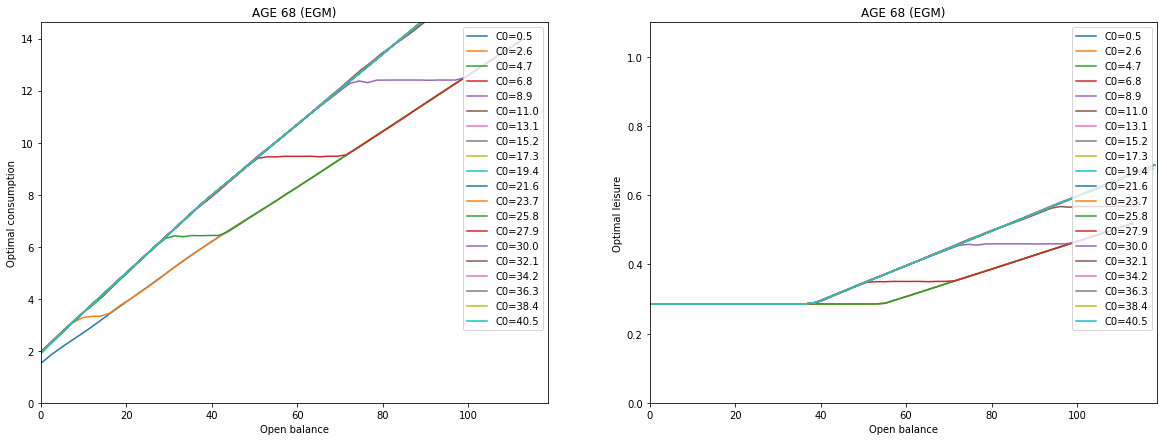

In [20]:
# SELECT YOUR AGE HERE TO PLOT OPTIMAL CONSUMPTION AND LEISURE (65-74)
AGE = 68

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['C%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal consumption')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, )
    
plt.subplot(1,2,2)
for i in range(Refc_grids):
    REF = Lower_grid_ref+(Upper_grid_ref-Lower_grid_ref)/(Refc_grids-1)*i
    plt.plot(Optimal_results_EGM['M%1d'%(AGE)][i], Optimal_results_EGM['L%1d'%(AGE)][i], label='C0=%1.1f'%(REF))
    plt.legend(loc='upper right')
    plt.xlabel('Open balance')
    plt.ylabel('Optimal leisure')
    plt.title('AGE %1d (EGM)'%(AGE))
    plt.xlim(0, )
    plt.ylim(0, 1.1)

hide_toggle()